In [1]:
import pandas as pd
import autograd.numpy as np
from autograd import grad 
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
from common import gradient_descent, plot_cost_histories

In [2]:
# Read data
DATA_BASE_URL = "https://raw.githubusercontent.com/sql-injection/spotify_data/master/"
datasets = {
    "train": DATA_BASE_URL + "train.csv",
    "test": DATA_BASE_URL + "test.csv",
    "all": DATA_BASE_URL + "spotify.csv"
}

total_df = pd.read_csv(datasets["all"])
train_df = pd.read_csv(datasets["train"])
test_df = pd.read_csv(datasets["test"])
attribute_names = list(train_df)[:-1]

# Split test and training into x and y values
x_train = train_df[attribute_names]
y_train = train_df["Class"]
x_test = test_df[attribute_names]
y_test = test_df["Class"]

x = x_train
y = y_train
x = x.values
y = y.values

original_x = np.copy(x)
original_y = np.copy(y)

In [3]:
genre_histograms = {
    "edm":       np.asarray([1, 0, 0, 0, 0, 0, 0]),
    "hiphop":    np.asarray([0, 1, 0, 0, 0, 0, 0]),
    "classical": np.asarray([0, 0, 1, 0, 0, 0, 0]),
    "jazz":      np.asarray([0, 0, 0, 1, 0, 0, 0]),
    "pop":       np.asarray([0, 0, 0, 0, 1, 0, 0]),
    "country":   np.asarray([0, 0, 0, 0, 0, 1, 0]),
    "rock":      np.asarray([0, 0, 0, 0, 0, 0, 1])
}

In [4]:
# Genre encoded into one-hot vectors
y_encoded = np.array([genre_histograms[genre] for genre in y])

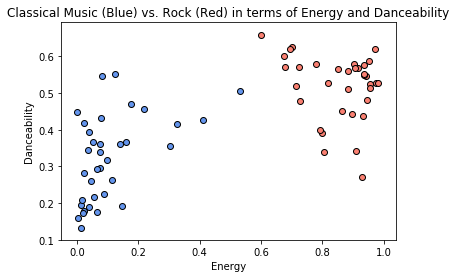

In [5]:
feature_a_indices =  np.where(y == "classical")[0]
feature_b_indices = np.where(y == "rock")[0]
feature_a_color = "cornflowerblue";
feature_b_color = "salmon";

attribute_names = np.array(attribute_names)
energy_attribute_index = np.where(attribute_names == "energy")[0][0]
danceability_attribute_index = np.where(attribute_names == "danceability")[0][0]

f = plt.figure()
ax = plt.subplot()
ax.set_xlabel("Energy")
ax.set_ylabel("Danceability")
ax.set_title("Classical Music (Blue) vs. Rock (Red) in terms of Energy and Danceability")
for i in feature_a_indices:
    ax.scatter(original_x[i, energy_attribute_index],
               original_x[i, danceability_attribute_index],
               color=feature_a_color, edgecolor='k')
    
for i in feature_b_indices:
    ax.scatter(original_x[i, energy_attribute_index],
               original_x[i, danceability_attribute_index],
               color=feature_b_color, edgecolor='k')


In [17]:
X = original_x[:, :2]
included_indices = np.concatenate((feature_a_indices, feature_b_indices))
X = np.take(X, included_indices, axis=0)
Y = np.take(original_y, included_indices, axis=0)
Y[Y == "classical"] = 0
Y[Y == "rock"] = 1

In [64]:
x = X
y = Y[:, np.newaxis]
print(x.shape)
print(y.shape)

(70, 2)
(70, 1)


In [89]:
# # define sigmoid function
# def sigmoid(t):
#     return 1/(1 + np.exp(-t))

def model(x, w):
    a = w[0] + np.dot(x.T, w[1:])
    return a.T

# # sigmoid non-convex logistic least squares cost function
def sigmoid_least_squares(w):
    print(x.shape, w.shape)
    all_evals = model(x, w)
    print(all_evals)
#     cost = 0
#     for p in range(y.size):
#         x_p = x[p][:, np.newaxis]
#         y_p = y[p]
        
#         # a_p = sigmoid(model(x_p, w))
#         # print(a_p, y_p)

#         cost += (a_p - y_p)**2
        
#     return cost/y.size

sigmoid_least_squares(w)


(70, 2) (2, 70)


ValueError: shapes (2,70) and (1,70) not aligned: 70 (dim 1) != 1 (dim 0)

In [91]:
w = np.random.randn(3, 2)
learning_rate = 0.1
g = sigmoid_least_squares
max_its = 100

In [67]:
weight_history, cost_history = gradient_descent(g, learning_rate, max_its, w)

(2, 1) (3, 2)
(2, 1) (3, 2)
(2, 1) (3, 2)
(2, 1) (3, 2)
(2, 1) (3, 2)
(2, 1) (3, 2)
(2, 1) (3, 2)
(2, 1) (3, 2)
(2, 1) (3, 2)
(2, 1) (3, 2)
(2, 1) (3, 2)
(2, 1) (3, 2)
(2, 1) (3, 2)
(2, 1) (3, 2)
(2, 1) (3, 2)
(2, 1) (3, 2)
(2, 1) (3, 2)
(2, 1) (3, 2)
(2, 1) (3, 2)
(2, 1) (3, 2)
(2, 1) (3, 2)
(2, 1) (3, 2)
(2, 1) (3, 2)
(2, 1) (3, 2)
(2, 1) (3, 2)
(2, 1) (3, 2)
(2, 1) (3, 2)
(2, 1) (3, 2)
(2, 1) (3, 2)
(2, 1) (3, 2)
(2, 1) (3, 2)
(2, 1) (3, 2)
(2, 1) (3, 2)
(2, 1) (3, 2)
(2, 1) (3, 2)
(2, 1) (3, 2)
(2, 1) (3, 2)
(2, 1) (3, 2)
(2, 1) (3, 2)
(2, 1) (3, 2)
(2, 1) (3, 2)
(2, 1) (3, 2)
(2, 1) (3, 2)
(2, 1) (3, 2)
(2, 1) (3, 2)
(2, 1) (3, 2)
(2, 1) (3, 2)
(2, 1) (3, 2)
(2, 1) (3, 2)
(2, 1) (3, 2)
(2, 1) (3, 2)
(2, 1) (3, 2)
(2, 1) (3, 2)
(2, 1) (3, 2)
(2, 1) (3, 2)
(2, 1) (3, 2)
(2, 1) (3, 2)
(2, 1) (3, 2)
(2, 1) (3, 2)
(2, 1) (3, 2)
(2, 1) (3, 2)
(2, 1) (3, 2)
(2, 1) (3, 2)
(2, 1) (3, 2)
(2, 1) (3, 2)
(2, 1) (3, 2)
(2, 1) (3, 2)
(2, 1) (3, 2)
(2, 1) (3, 2)
(2, 1) (3, 2)
(2, 1) (3, 2)
(2, 1)

TypeError: Grad only applies to real scalar-output functions. Try jacobian or elementwise_grad.